## import required python packages


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

## import loan.csv file and print first 5 records

In [2]:
loan = pd.read_csv('loan.csv')
loan.head()

/var/folders/wc/s5jc1qxj0ksc58r77p3225n00000gn/T/ipykernel_60556/3677655166.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [44]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
issue_year                     object
issue_month                    object
Length: 113, dtype: object

## Data cleanup 
1. replace all NaN with 0
2. remove % sign
3. Convert interest rate to float
4. Remove records with employment length as n/a

In [3]:
loan = loan.fillna(0)

In [4]:
loan.int_rate = loan.int_rate.apply(lambda x : x[:-1])

In [ ]:
loan.int_rate = loan.int_rate.astype(float)

In [ ]:
loan = loan[loan.emp_length != "n/a"]

In [7]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issue_year,issue_month
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dec,11
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dec,11
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dec,11
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dec,11
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dec,11


## Outliers removal
##### Box plot the loan amount to remove the outliers

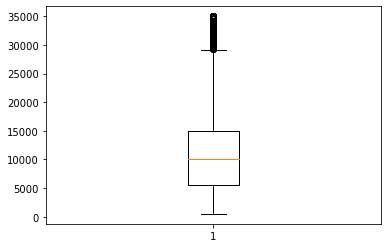

In [8]:
plt.boxplot(loan.loan_amnt)
plt.show()

##### Remove all the records having loan amount greater than 30000

In [9]:
loan = loan[loan.loan_amnt <= 30000]

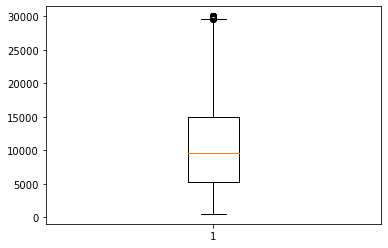

In [10]:
plt.boxplot(loan.loan_amnt)
plt.show()

##### boxplot annual income to remove outliers

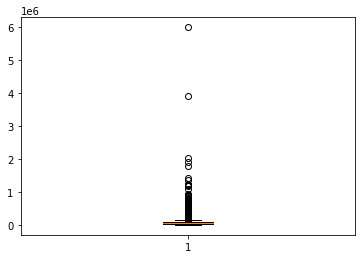

In [11]:
plt.boxplot(loan.annual_inc)
plt.show()

##### remove all records with more than 100,000 annual income

In [12]:
loan = loan[loan.annual_inc < 100000]

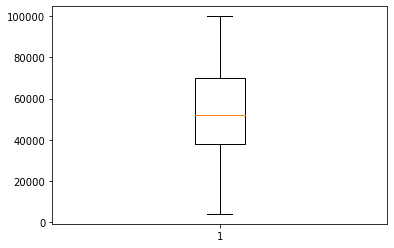

In [13]:
plt.boxplot(loan.annual_inc)
plt.show()

## Univariate analysis on all loan accounts
    1. Loan Amount 
    2. Interest rate
    

In [17]:
loan.loan_amnt.describe()

count    33155.000000
mean      9990.154577
std       6259.765639
min        500.000000
25%       5000.000000
50%       8650.000000
75%      14000.000000
max      30000.000000
Name: loan_amnt, dtype: float64

In [24]:
loan.int_rate.describe()

count    33155.000000
mean        11.881906
std          3.633344
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

## Overall loan account status 

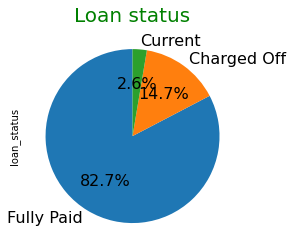

In [68]:
loan.loan_status.value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)
plt.title("Loan account status", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

## Statewise loan applications

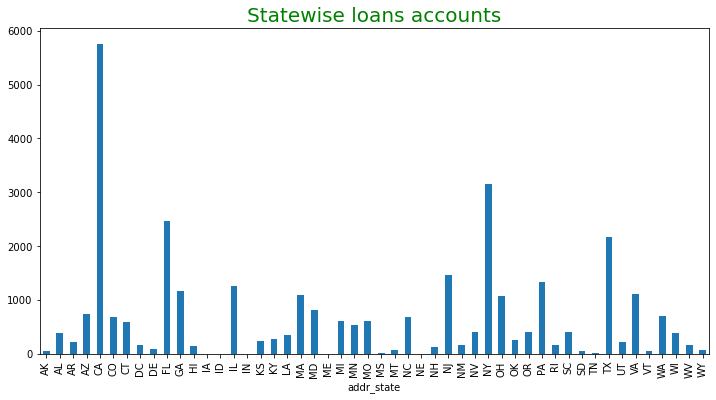

In [77]:
plt.figure(figsize=(12,6))
loan.groupby(["addr_state"])["loan_status"].count().plot.bar()
plt.title("Statewise loans accounts", fontdict={"fontsize": 20, "fontweight": 20, "color": "Green"})
plt.show()

## Filter out Fully Paid loan accounts for analysis¶

In [72]:
fully_paid = loan[loan.loan_status == "Fully Paid"]

## Filter out charged off loan account for analysis

In [15]:
charged_off = loan[loan.loan_status == "Charged Off"]

## Statewise number of fully paid loan accounts

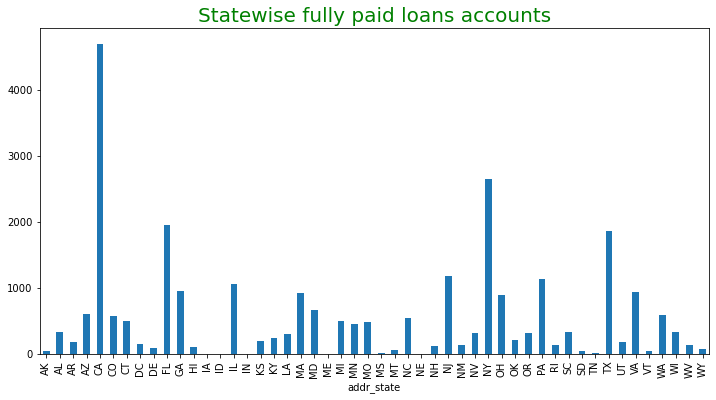

In [88]:
plt.figure(figsize=(12,6))
fully_paid.groupby(["addr_state"])["loan_status"].count().plot.bar()
plt.title("Statewise fully paid loans accounts", fontdict={"fontsize": 20, "fontweight": 20, "color": "Green"})
plt.show()

## Statewise number of charged off loan accounts

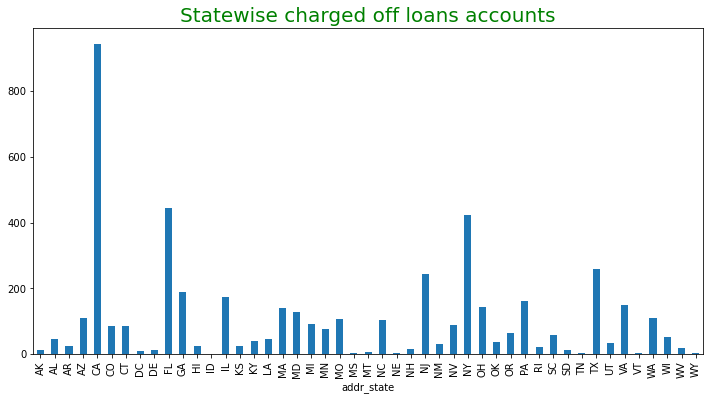

In [51]:
plt.figure(figsize=(12,6))
charged_off.groupby(["addr_state"])["loan_status"].count().plot.bar()
plt.title("Statewise charged off loans accounts", fontdict={"fontsize": 20, "fontweight": 20, "color": "Green"})
plt.show()

## Percentage of charged off loans across different states

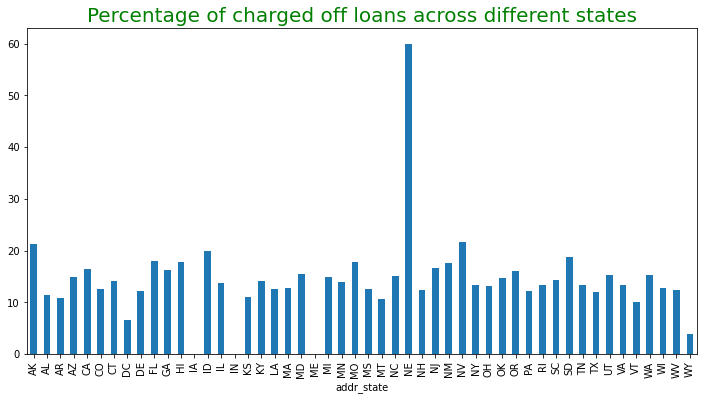

In [190]:
plt.figure(figsize=(12,6))
loan_state = loan.groupby(["addr_state"])['loan_status'].count()
charged_off_state = charged_off.groupby(["addr_state"])['loan_status'].count()
percentage_charged_off_loan = (charged_off_state/loan_state * 100)
percentage_charged_off_loan.plot.bar()
plt.title("Percentage of charged off loans across different states", fontdict={"fontsize": 20, "fontweight": 20, "color": "Green"})
plt.show()

## Employment length wise fully paid loan accounts

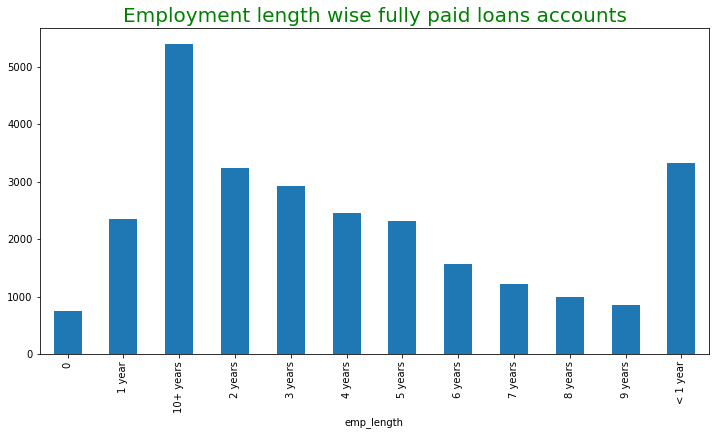

In [78]:
plt.figure(figsize=(12,6))
fully_paid.groupby(["emp_length"])["loan_status"].count().plot.bar()
plt.title("Employment length wise fully paid loans accounts", fontdict={"fontsize": 20, "fontweight": 20, "color": "Green"})
plt.show()

## Employment length wise charged off loan accounts

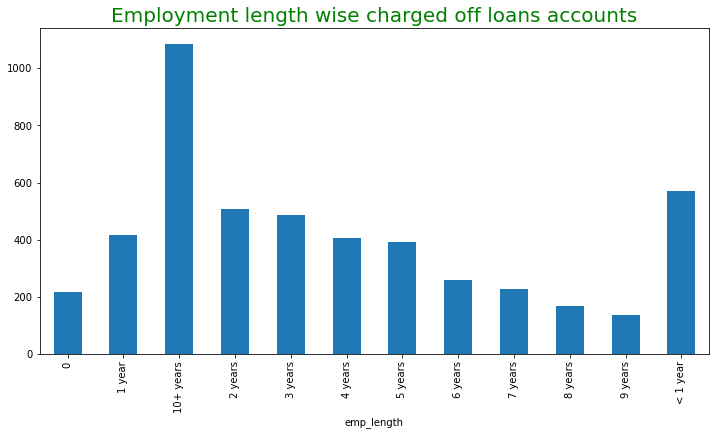

In [71]:
plt.figure(figsize=(12,6))
charged_off.groupby(["emp_length"])["loan_status"].count().plot.bar()
plt.title("Employment length wise charged off loans accounts", fontdict={"fontsize": 20, "fontweight": 20, "color": "Green"})
plt.show()

## Employment length wise charged off loan percentage

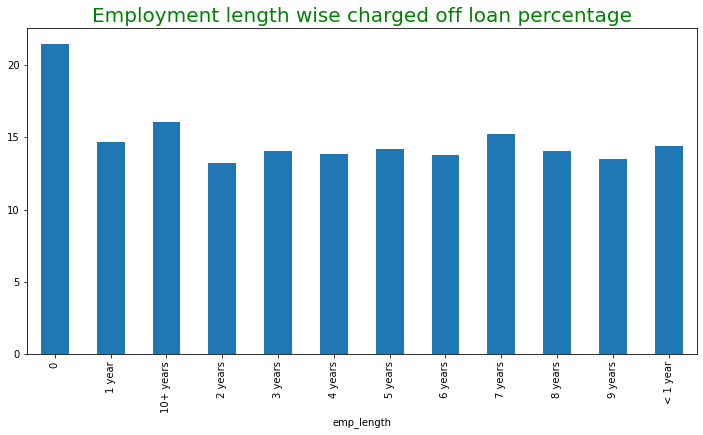

In [186]:
plt.figure(figsize=(12,6))
loan_emp_length = loan.groupby(["emp_length"])['loan_status'].count()
charged_off_emp_length = charged_off.groupby(["emp_length"])['loan_status'].count()
percentage_charged_off_loan = (charged_off_emp_length/loan_emp_length * 100)
percentage_charged_off_loan.plot.bar()
plt.title("Employment length wise charged off loan percentage", fontdict={"fontsize": 20, "fontweight": 20, "color": "Green"})
plt.show()

## Fully paid loan accounts Vs home ownership

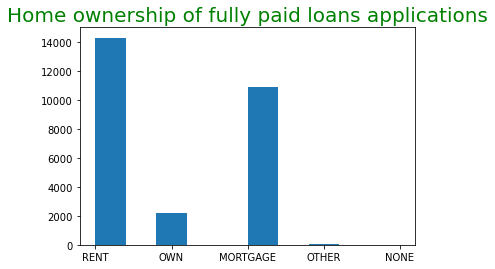

In [184]:
plt.hist(fully_paid.home_ownership)
plt.title("Home ownership of fully paid loans applications", fontdict={"fontsize": 20, "fontweight": 20, "color": "Green"})
plt.show()


##  Charged off loan accounts Vs home ownership

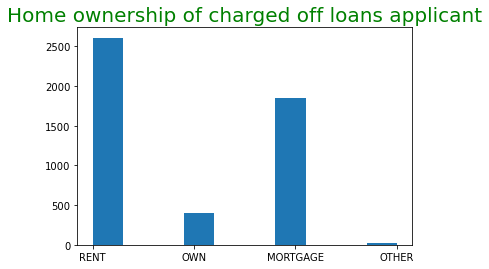

In [38]:
plt.hist(charged_off.home_ownership)
plt.title("Home ownership of charged off loans applicant", fontdict={"fontsize": 20, "fontweight": 20, "color": "Green"})
plt.show()

## Percentage of charged off loans across Home ownership status 

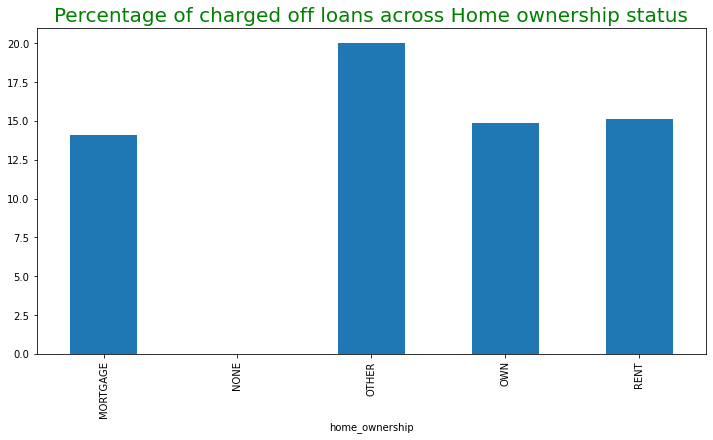

In [175]:
plt.figure(figsize=(12,6))
loan_home_ownership = loan.groupby(["home_ownership"])['loan_status'].count()
charged_off_home_ownership = charged_off.groupby(["home_ownership"])['loan_status'].count()
percentage_charged_off_loan = (charged_off_home_ownership/loan_home_ownership * 100)
percentage_charged_off_loan.plot.bar()
plt.title("Percentage of charged off loans across Home ownership status", fontdict={"fontsize": 20, "fontweight": 20, "color": "Green"})
plt.show()

## loan purpose of fully paid loans

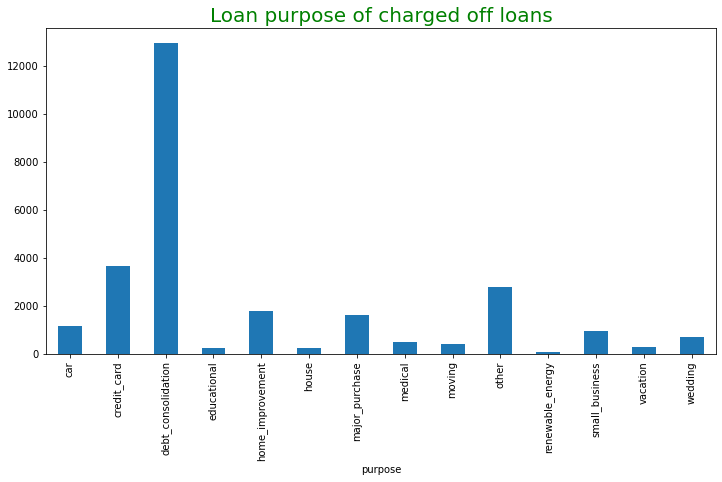

In [86]:
plt.figure(figsize=(12,6))
fully_paid.groupby(["purpose"])['loan_status'].count().plot.bar()
plt.xticks(rotation=90)
plt.title("Loan purpose of charged off loans", fontdict={"fontsize": 20, "fontweight": 20, "color": "Green"})
plt.show()

## loan purpose of charged off loans

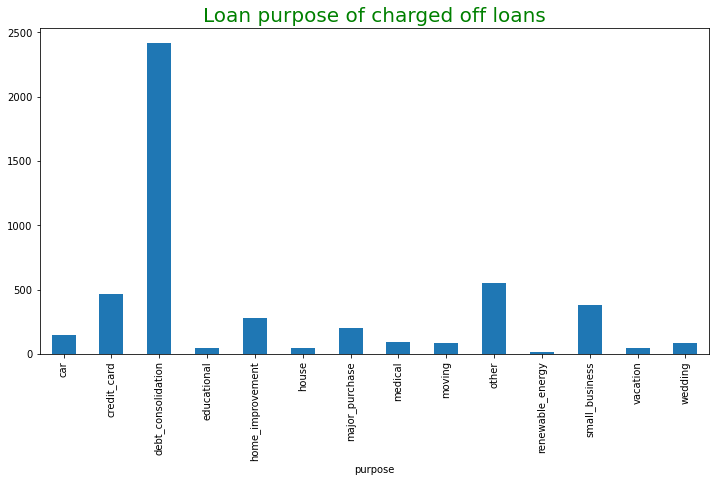

In [84]:
plt.figure(figsize=(12,6))
charged_off.groupby(["purpose"])['loan_status'].count().plot.bar()
plt.xticks(rotation=90)
plt.title("Loan purpose of charged off loans", fontdict={"fontsize": 20, "fontweight": 20, "color": "Green"})
plt.show()

## Loan purpose wise charged off loan account percentage

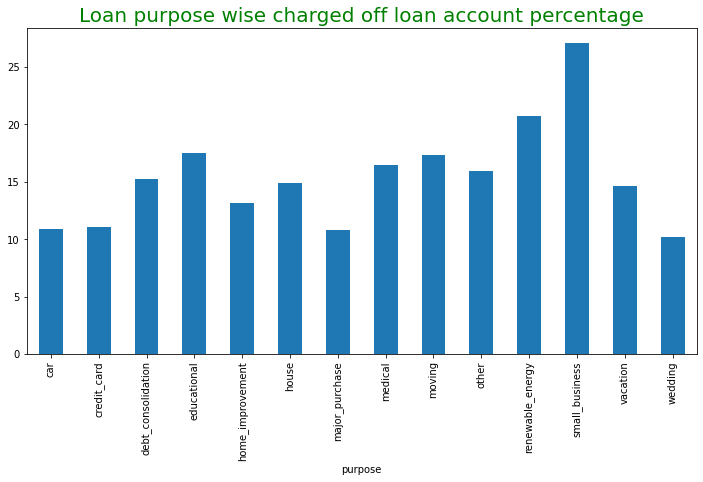

In [172]:
plt.figure(figsize=(12,6))
loan_purpose = loan.groupby(["purpose"])['loan_status'].count()
charged_off_purpose = charged_off.groupby(["purpose"])['loan_status'].count()
percentage_charged_off_loan = (charged_off_purpose/loan_purpose * 100)
percentage_charged_off_loan.plot.bar()
plt.title("Loan purpose wise charged off loan account percentage", fontdict={"fontsize": 20, "fontweight": 20, "color": "Green"})
plt.show()

## Loan grade vs loan status for fully paid loans

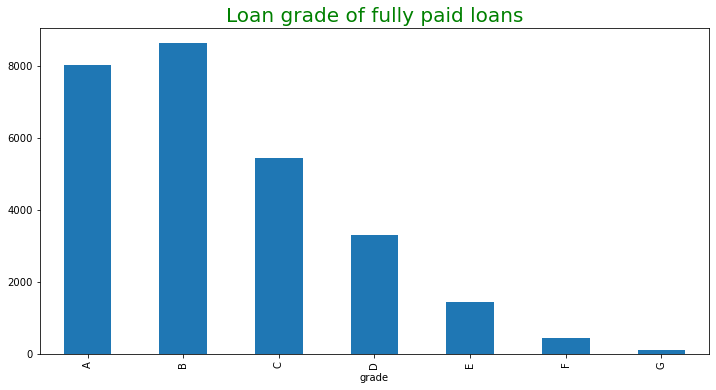

In [119]:
plt.figure(figsize=(12,6))
fully_paid.groupby(["grade"])['loan_status'].count().plot.bar()
plt.xticks(rotation=90)
plt.title("Loan grade of fully paid loans", fontdict={"fontsize": 20, "fontweight": 20, "color": "Green"})
plt.show()

## Loan grade vs loan status for charged off loans

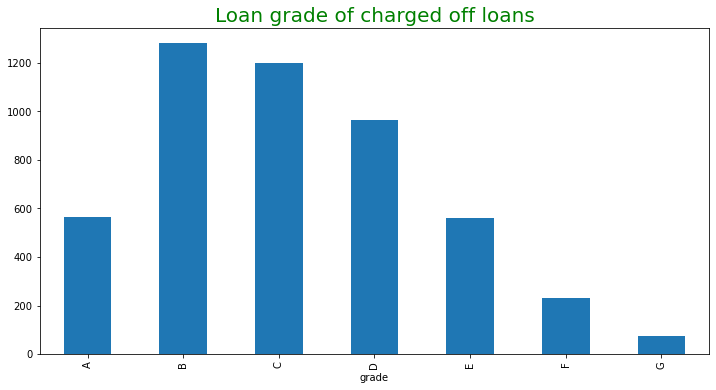

In [120]:
plt.figure(figsize=(12,6))
charged_off.groupby(["grade"])['loan_status'].count().plot.bar()
plt.xticks(rotation=90)
plt.title("Loan grade of charged off loans", fontdict={"fontsize": 20, "fontweight": 20, "color": "Green"})
plt.show()

## Percentage of charged off loans across different loan grades

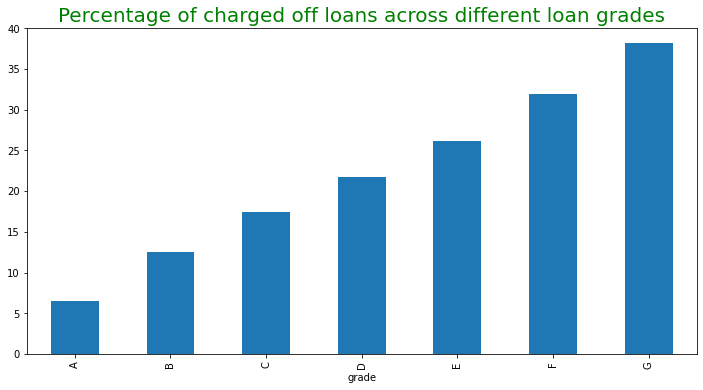

In [165]:
plt.figure(figsize=(12,6))
loan_grade = loan.groupby(["grade"])['loan_status'].count()
charged_off_grade = charged_off.groupby(["grade"])['loan_status'].count()
percentage_charged_off_loan = (charged_off_grade/loan_grade * 100)
percentage_charged_off_loan.plot.bar()
plt.title("Percentage of charged off loans across different loan grades", fontdict={"fontsize": 20, "fontweight": 20, "color": "Green"})
plt.show()

## Charged off loan distribution based on income varification

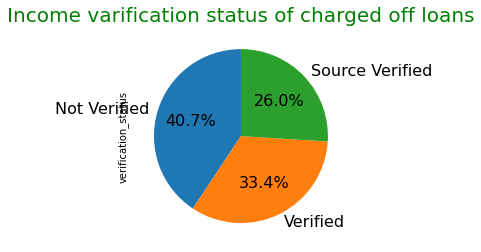

In [36]:
charged_off.verification_status.value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)
plt.title("Income varification status of charged off loans", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

## Median intertest rate for income source varification and house ownership

In [57]:
loans_home_ownership = pd.pivot_table(data=loan,index="verification_status",columns="home_ownership",values="int_rate",aggfunc=np.median)

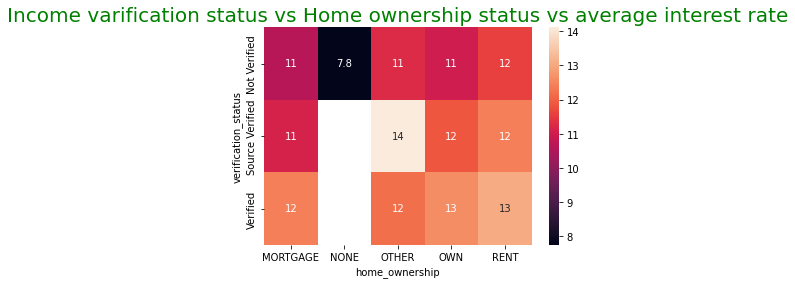

In [63]:
sns.heatmap(loans_home_ownership, annot=True)
plt.title("Income varification status vs Home ownership status vs average interest rate", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

## Loan status vs varification status vs avg annual income

In [107]:
loans_income_status = pd.pivot_table(data=loan,index="verification_status", columns="loan_status",values="annual_inc",aggfunc=np.median)

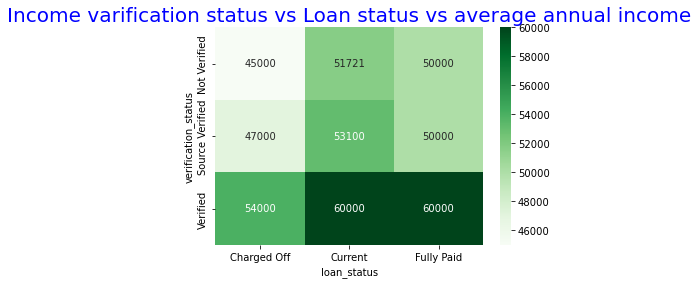

In [115]:
sns.heatmap(loans_income_status, annot=True, cmap = "Greens", fmt="0.0f")
plt.title("Income varification status vs Loan status vs average annual income", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Blue'})
plt.show()